In [1]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 11 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-0 amd64 2.24.32-1ubuntu1 [1,769 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main

In [2]:
!pip install bnlearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 54 kB 2.0 MB/s 
     |████████████████████████████████| 9.4 MB 7.1 MB/s 
     |████████████████████████████████| 748 kB 49.5 MB/s 
     |████████████████████████████████| 216 kB 48.3 MB/s 
     |████████████████████████████████| 1.9 MB 59.1 MB/s 
     |████████████████████████████████| 965 kB 50.0 MB/s 
     |████████████████████████████████| 295 kB 54.0 MB/s 
     |████████████████████████████████| 1.6 MB 47.7 MB/s 
     |████████████████████████████████| 40 kB 5.1 MB/s 
  Created wheel for pyvis: filename=pyvis-0.3.1-py3-none-any.whl size=755850 sha256=f6d067bd6f5200e9243a5d8b6fab50a2dcc02a9a60f09ca7706e61970699d589
  Stored in directory: /root/.cache/pip/wheels/a4/0c/61/8469ca276f96ab772c3acc7f47d71e9737cbdf6f446f017f48
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=e4eadc265686ee8f0f76297b7c6d2110bc432042f8085f69b8

In [3]:
!pip install scikit-learn>=1.0.0

In [4]:
!pip install causalnex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 4.3 MB/s 
     |████████████████████████████████| 24.9 MB 1.6 MB/s 
     |████████████████████████████████| 27.2 MB 1.4 MB/s 
     |████████████████████████████████| 76 kB 6.4 MB/s 
     |████████████████████████████████| 132 kB 61.7 MB/s 
     |████████████████████████████████| 52 kB 1.2 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp38-cp38-linux_x86_64.whl size=72365 sha256=7fb853a7b747f7561569a1627ef583652cc03218a024177b82f768e3431862ae
  Stored in directory: /root/.cache/pip/wheels/5f/fd/9e/b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73
Successfully built wrapt
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-

In [ ]:
!pip install Matplotlib==3.3.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.5 MB 7.2 MB/s 
  Attempting uninstall: Matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3


In [1]:
import pandas as pd
import numpy as np
import warnings
from causalnex.structure.notears import from_pandas
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
from sklearn import preprocessing
import bnlearn as bn
from causalnex.discretiser import Discretiser
import networkx as nx

In [3]:
df = pd.read_csv("/content/df_suicidio_ansiedade_ability.csv")
#df = pd.read_csv("/content/df_suic_ansiedade_ability_features_completas.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3612 entries, 0 to 3611
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           3612 non-null   int64  
 1   Chave                                3612 non-null   object 
 2   Alcoolatra                           3612 non-null   int64  
 3   Droga                                3612 non-null   int64  
 4   Suic_familia                         3612 non-null   int64  
 5   Dep_familia                          3612 non-null   int64  
 6   Alc_familia                          3612 non-null   int64  
 7   Drog_familia                         3612 non-null   int64  
 8   Neuro                                3612 non-null   int64  
 9   psiquiatrica                         3612 non-null   int64  
 10  Capaz de desfrutar das coisas        3612 non-null   int64  
 11  Impacto de sua familia e amigo

In [ ]:
df_suic = df[['sexo', 'Estado_civil', 'Tipo_Resid', 'Alcoolatra', 'Droga', 'Suic_familia', 'Dep_familia',
              'Alc_familia', 'Drog_familia', 'Neuro', 'psiquiatrica',
              'Capaz de desfrutar das coisas', 'Impacto de sua familia e amigos', 'Capaz de tomar decisões importantes',
              'Estudante', 'Insonia',  'Perda de insights', 'Apetite', 'Perda de peso',
               'Hipocondriase', 'Sentimentos_culpa', 'Trabalho e interesses',
              'Energia', 'Lentidao pensamento e fala', 'Agitação', 'Libido',  'TOC', 'idade', 'ability_suicidio']] 

In [ ]:
df_suic['sexo'] = np.where(df_suic['sexo'] == 'F', 1, 0)

df_suic = df_suic.dropna()

## SUICÍDIO

In [ ]:
names  =['sexo', 'Estado_civil', 'Tipo_Resid', 'Alcoolatra', 'Droga', 'Suic_familia', 'Dep_familia',
              'Alc_familia', 'Drog_familia', 'Neuro', 'psiquiatrica',
              'Capaz de desfrutar das coisas', 'Impacto de sua familia e amigos', 'Capaz de tomar decisões importantes',
              'Estudante', 'Insonia',  'Perda de insights', 'Apetite', 'Perda de peso',
               'Hipocondriase', 'Sentimentos_culpa', 'Trabalho e interesses',
              'Energia', 'Lentidao pensamento e fala', 'Agitação', 'Libido',  'TOC','idade'] 

d = preprocessing.normalize(df_suic[names])
df_norm = pd.DataFrame(d, columns=names)
df_norm.head()

,sexo,Estado_civil,Tipo_Resid,Alcoolatra,Droga,Suic_familia,Dep_familia,Alc_familia,Drog_familia,Neuro,...,Apetite,Perda de peso,Hipocondriase,Sentimentos_culpa,Trabalho e interesses,Energia,Lentidao pensamento e fala,Agitação,Libido,TOC
0,0.0,0.290021,0.290021,0.000000,0.0,0.000000,0.096674,0.096674,0.096674,0.096674,...,0.000000,0.000000,0.193347,0.290021,0.193347,0.193347,0.096674,0.096674,0.193347,0.290021
1,0.0,0.133631,0.534522,0.000000,0.0,0.000000,0.133631,0.133631,0.000000,0.000000,...,0.267261,0.267261,0.000000,0.267261,0.267261,0.267261,0.133631,0.133631,0.267261,0.000000
2,0.0,0.141421,0.141421,0.000000,0.0,0.141421,0.141421,0.000000,0.141421,0.000000,...,0.141421,0.000000,0.000000,0.424264,0.424264,0.282843,0.141421,0.282843,0.282843,0.000000
3,0.0,0.102598,0.102598,0.000000,0.0,0.000000,0.102598,0.102598,0.000000,0.000000,...,0.205196,0.102598,0.307794,0.410391,0.307794,0.205196,0.102598,0.205196,0.205196,0.615587
4,0.0,0.450035,0.112509,0.112509,0.0,0.000000,0.112509,0.112509,0.000000,0.000000,...,0.112509,0.112509,0.112509,0.225018,0.450035,0.225018,0.000000,0.112509,0.225018,0.000000


In [ ]:
df_norm['ability_suicidio']=df_suic['ability_suicidio'] #'ability'

In [ ]:
sm = from_pandas(df_norm)

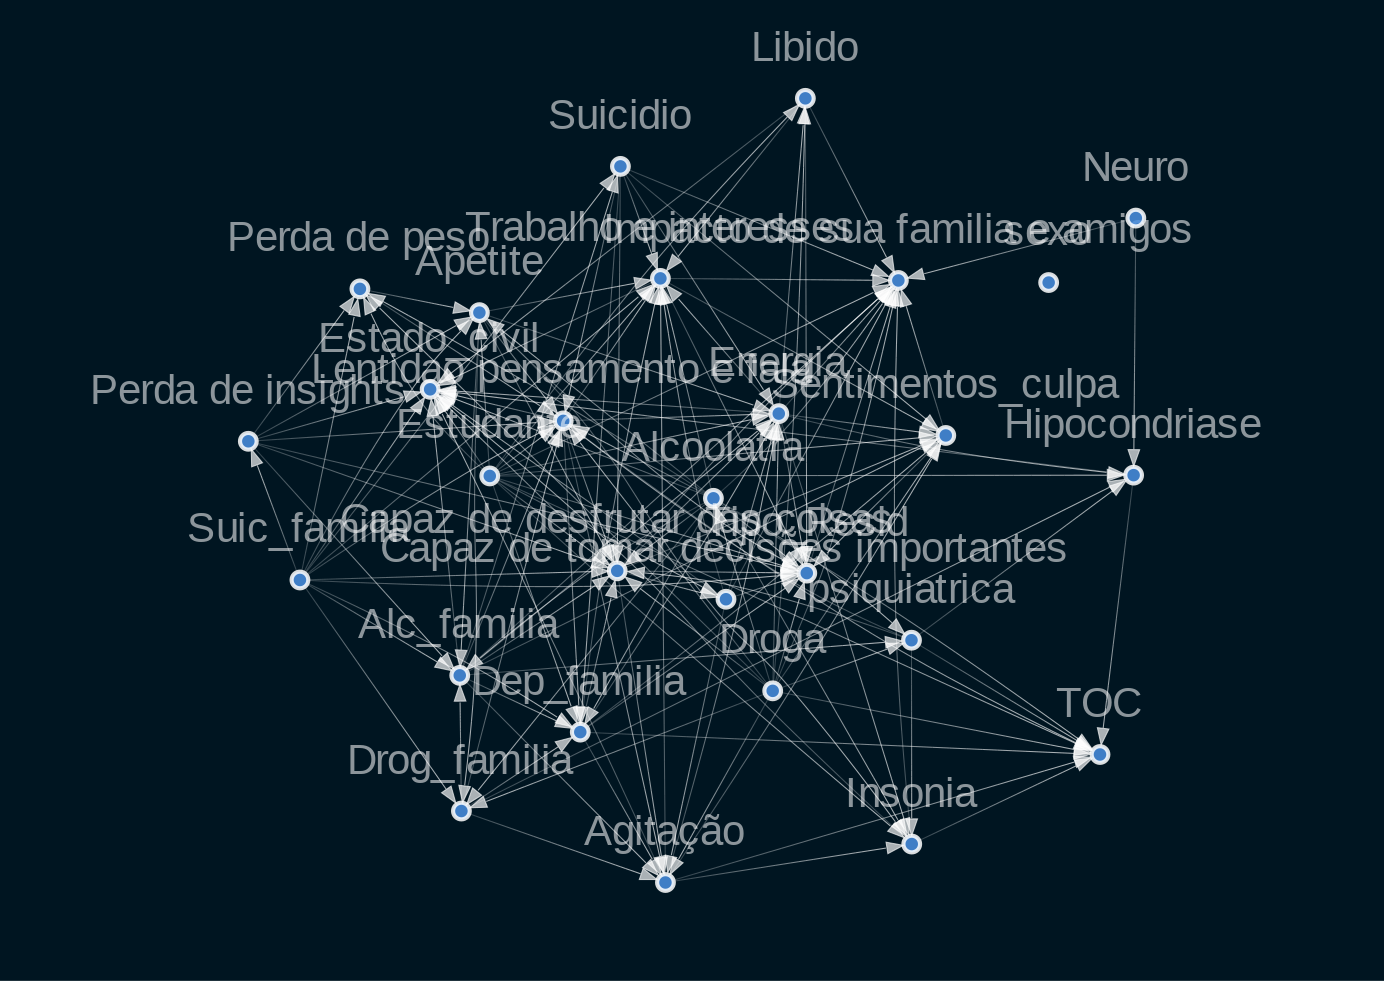

In [ ]:
# Retirando arestas mais fracas
sm.remove_edges_below_threshold(0.5)
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.3"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
    prog='fdp',
)
Image(viz.draw(format='png'))

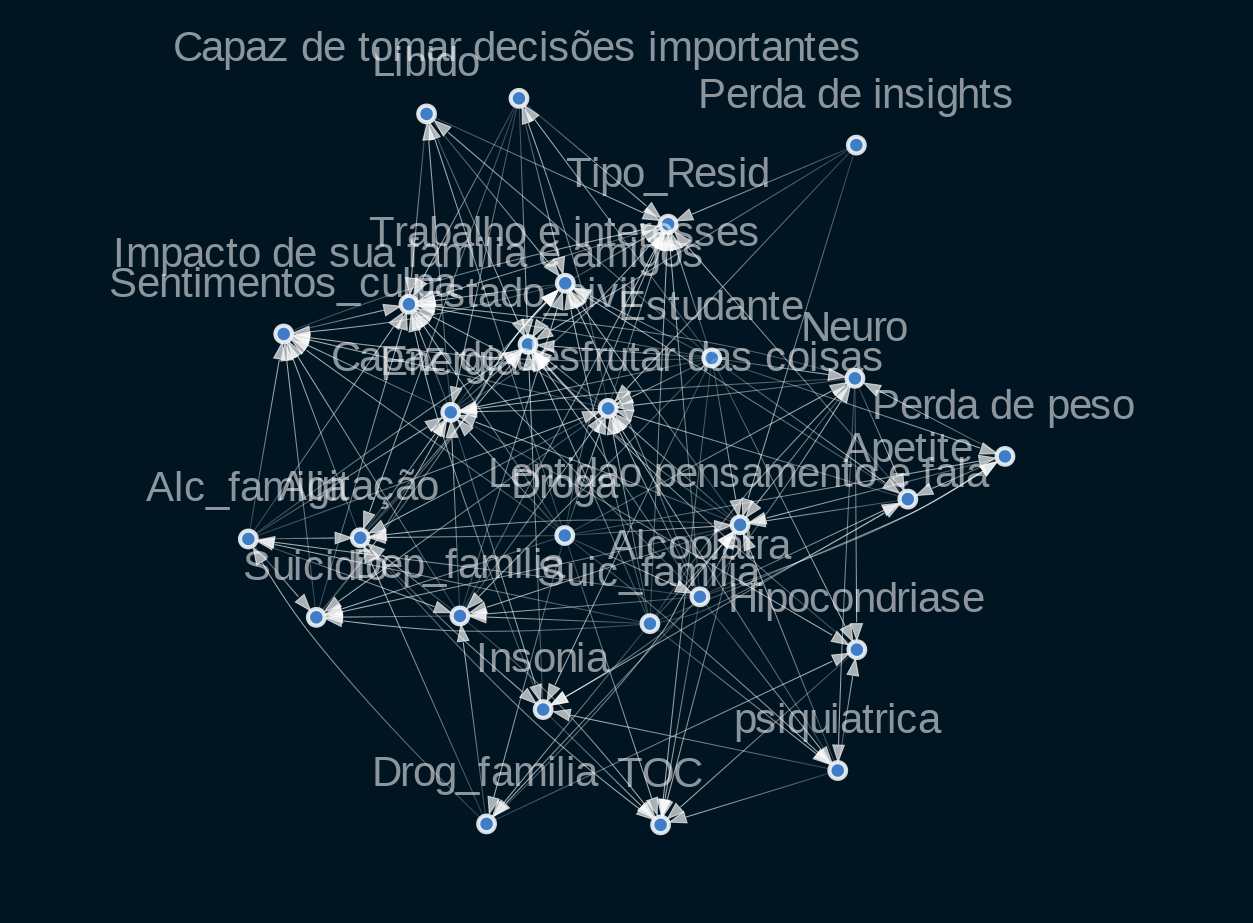

In [ ]:
#obtendo maior subgrafo
sm = sm.get_largest_subgraph()
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
Image(viz.draw(format='png',args="-Nshape=box -Edir=forward -Ecolor=red "))


In [ ]:
# Gerando Markov Blanket
mb = sm.get_markov_blanket('ability_suicidio')

In [ ]:
mb.edges

OutEdgeView([('Capaz de desfrutar das coisas', 'Tipo_Resid'), ('Capaz de desfrutar das coisas', 'Impacto de sua familia e amigos'), ('Capaz de desfrutar das coisas', 'Capaz de tomar decisões importantes'), ('Capaz de desfrutar das coisas', 'Sentimentos_culpa'), ('Capaz de desfrutar das coisas', 'Energia'), ('Capaz de desfrutar das coisas', 'Agitação'), ('Capaz de desfrutar das coisas', 'Suicidio'), ('Alcoolatra', 'Tipo_Resid'), ('Alcoolatra', 'Dep_familia'), ('Alcoolatra', 'Alc_familia'), ('Alcoolatra', 'Neuro'), ('Alcoolatra', 'Capaz de desfrutar das coisas'), ('Alcoolatra', 'Impacto de sua familia e amigos'), ('Alcoolatra', 'Insonia'), ('Alcoolatra', 'Apetite'), ('Alcoolatra', 'Trabalho e interesses'), ('Alcoolatra', 'Lentidao pensamento e fala'), ('Agitação', 'Insonia'), ('Agitação', 'Sentimentos_culpa'), ('Agitação', 'Trabalho e interesses'), ('Agitação', 'Energia'), ('Apetite', 'Tipo_Resid'), ('Apetite', 'Capaz de desfrutar das coisas'), ('Apetite', 'Insonia'), ('Apetite', 'Trabal

In [ ]:
edges = [('Capaz de desfrutar das coisas', 'Tipo_Resid'), ('Capaz de desfrutar das coisas', 'Impacto de sua familia e amigos'), ('Capaz de desfrutar das coisas', 'Capaz de tomar decisões importantes'), ('Capaz de desfrutar das coisas', 'Sentimentos_culpa'), ('Capaz de desfrutar das coisas', 'Energia'), ('Capaz de desfrutar das coisas', 'Agitação'), ('Capaz de desfrutar das coisas', 'Suicidio'), ('Alcoolatra', 'Tipo_Resid'), ('Alcoolatra', 'Dep_familia'), ('Alcoolatra', 'Alc_familia'), ('Alcoolatra', 'Neuro'), ('Alcoolatra', 'Capaz de desfrutar das coisas'), ('Alcoolatra', 'Impacto de sua familia e amigos'), ('Alcoolatra', 'Insonia'), ('Alcoolatra', 'Apetite'), ('Alcoolatra', 'Trabalho e interesses'), ('Alcoolatra', 'Lentidao pensamento e fala'), ('Agitação', 'Insonia'), ('Agitação', 'Sentimentos_culpa'), ('Agitação', 'Trabalho e interesses'), ('Agitação', 'Energia'), ('Apetite', 'Tipo_Resid'), ('Apetite', 'Capaz de desfrutar das coisas'), ('Apetite', 'Insonia'), ('Apetite', 'Trabalho e interesses'), ('Apetite', 'Lentidao pensamento e fala'), ('Lentidao pensamento e fala', 'Dep_familia'), ('Lentidao pensamento e fala', 'Capaz de desfrutar das coisas'), ('Lentidao pensamento e fala', 'Trabalho e interesses'), ('Lentidao pensamento e fala', 'Energia'), ('Lentidao pensamento e fala', 'Agitação'), ('Lentidao pensamento e fala', 'Suicidio'), ('Energia', 'Tipo_Resid'), ('Energia', 'Impacto de sua familia e amigos'), ('Energia', 'Insonia'), ('Energia', 'Sentimentos_culpa'), ('Energia', 'Trabalho e interesses'), ('Energia', 'Libido'), ('Insonia', 'Impacto de sua familia e amigos'), ('Tipo_Resid', 'Impacto de sua familia e amigos'), ('Dep_familia', 'Tipo_Resid'), ('Dep_familia', 'Capaz de desfrutar das coisas'), ('Dep_familia', 'Sentimentos_culpa'), ('Dep_familia', 'Trabalho e interesses'), ('Dep_familia', 'Energia'), ('Dep_familia', 'Agitação'), ('Dep_familia', 'Suicidio'), ('Sentimentos_culpa', 'Tipo_Resid'), ('Sentimentos_culpa', 'Impacto de sua familia e amigos'), ('Droga', 'Tipo_Resid'), ('Droga', 'Alcoolatra'), ('Droga', 'Neuro'), ('Droga', 'Capaz de desfrutar das coisas'), ('Droga', 'Impacto de sua familia e amigos'), ('Droga', 'Sentimentos_culpa'), ('Droga', 'Energia'), ('Droga', 'Lentidao pensamento e fala'), ('Droga', 'Agitação'), ('Droga', 'Libido'), ('Droga', 'Suicidio'), ('Neuro', 'Capaz de desfrutar das coisas'), ('Neuro', 'Impacto de sua familia e amigos'), ('Neuro', 'Apetite'), ('Neuro', 'Energia'), ('Neuro', 'Lentidao pensamento e fala'), ('Trabalho e interesses', 'Tipo_Resid'), ('Trabalho e interesses', 'Impacto de sua familia e amigos'), ('Trabalho e interesses', 'Sentimentos_culpa'), ('Alc_familia', 'Dep_familia'), ('Alc_familia', 'Capaz de desfrutar das coisas'), ('Alc_familia', 'Impacto de sua familia e amigos'), ('Alc_familia', 'Sentimentos_culpa'), ('Alc_familia', 'Energia'), ('Alc_familia', 'Agitação'), ('Alc_familia', 'Suicidio'), ('Suicidio', 'Impacto de sua familia e amigos'), ('Suicidio', 'Sentimentos_culpa'), ('Suicidio', 'Trabalho e interesses'), ('Suicidio', 'Energia'), ('Libido', 'Tipo_Resid'), ('Libido', 'Impacto de sua familia e amigos'), ('Libido', 'Trabalho e interesses'), ('Capaz de tomar decisões importantes', 'Tipo_Resid'), ('Capaz de tomar decisões importantes', 'Impacto de sua familia e amigos'), ('Capaz de tomar decisões importantes', 'Trabalho e interesses'), ('Capaz de tomar decisões importantes', 'Energia'), ('Capaz de tomar decisões importantes', 'Agitação'), ('Estudante', 'Tipo_Resid'), ('Estudante', 'Dep_familia'), ('Estudante', 'Neuro'), ('Estudante', 'Capaz de desfrutar das coisas'), ('Estudante', 'Impacto de sua familia e amigos'), ('Estudante', 'Capaz de tomar decisões importantes'), ('Estudante', 'Insonia'), ('Estudante', 'Apetite'), ('Estudante', 'Sentimentos_culpa'), ('Estudante', 'Trabalho e interesses'), ('Estudante', 'Energia'), ('Estudante', 'Lentidao pensamento e fala'), ('Estudante', 'Libido'), ('Suic_familia', 'Tipo_Resid'), ('Suic_familia', 'Dep_familia'), ('Suic_familia', 'Alc_familia'), ('Suic_familia', 'Neuro'), ('Suic_familia', 'Capaz de desfrutar das coisas'), ('Suic_familia', 'Apetite'), ('Suic_familia', 'Trabalho e interesses'), ('Suic_familia', 'Lentidao pensamento e fala'), ('Suic_familia', 'Suicidio')]

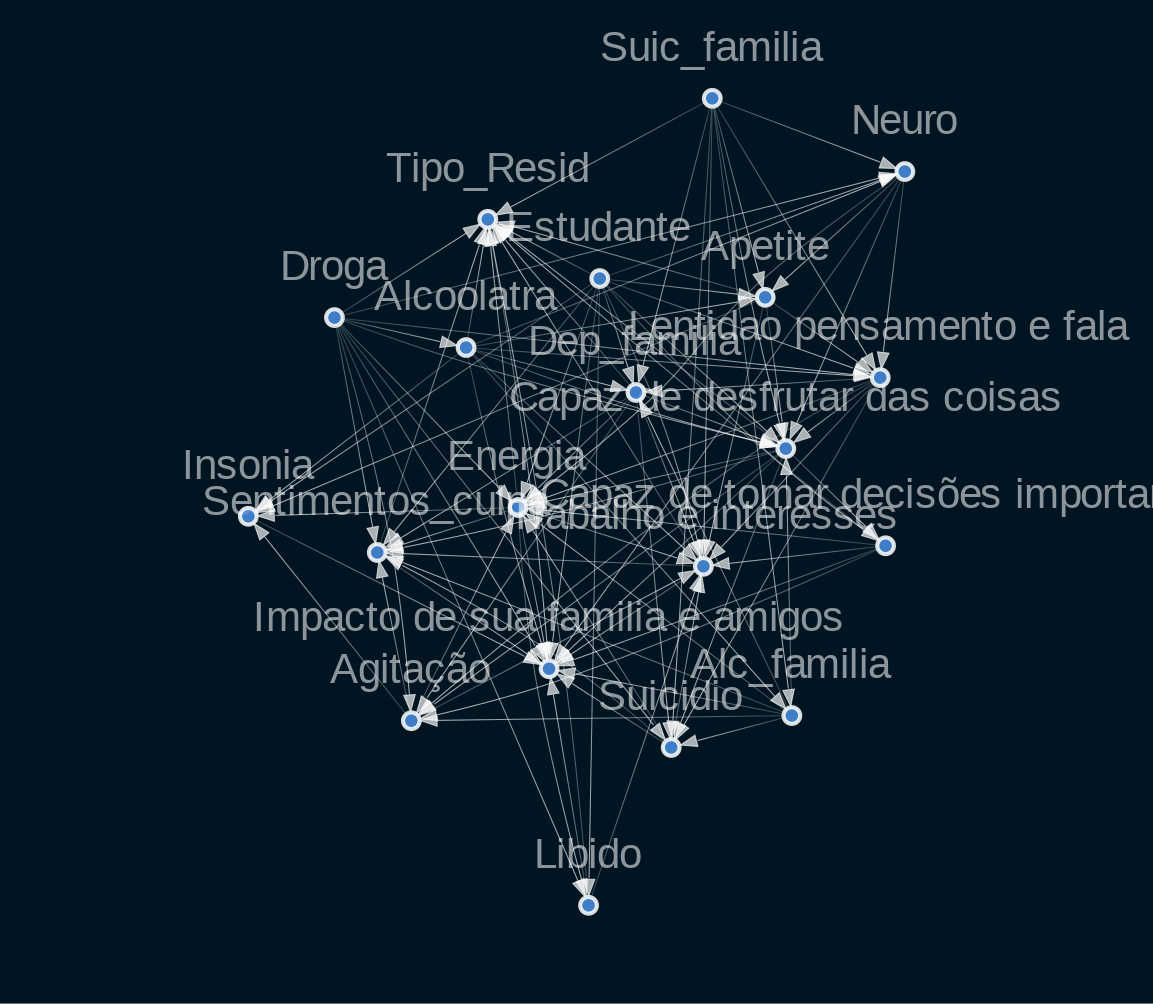

In [ ]:
viz = plot_structure(
    mb,
    graph_attributes={"scale": "0.3"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
    prog='fdp',
)
Image(viz.draw(format='png'))

In [ ]:
DAG = bn.make_DAG(mb.edges())
bn.plot(DAG, interactive=True)

AttributeError: ignored

In [ ]:
nx.drawing.nx_pydot.write_dot(sm, 'graph.dot')

### ANSIEDADE

In [4]:
df_suic = df[['sexo', 'Estado_civil', 'Tipo_Resid', 'Alcoolatra', 'Droga', 'Suic_familia', 'Dep_familia',
              'Alc_familia', 'Drog_familia', 'Neuro', 'psiquiatrica',
              'Capaz de desfrutar das coisas', 'Impacto de sua familia e amigos', 'Capaz de tomar decisões importantes',
              'Estudante', 'Insonia',  'Perda de insights', 'Apetite', 'Perda de peso',
               'Hipocondriase', 'Sentimentos_culpa', 'Trabalho e interesses',
              'Energia', 'Lentidao pensamento e fala', 'Agitação', 'Libido',  'TOC', 'idade', 'ability_ansiedade']] 

In [5]:
names  =['sexo', 'Estado_civil', 'Tipo_Resid', 'Alcoolatra', 'Droga', 'Suic_familia', 'Dep_familia',
              'Alc_familia', 'Drog_familia', 'Neuro', 'psiquiatrica',
              'Capaz de desfrutar das coisas', 'Impacto de sua familia e amigos', 'Capaz de tomar decisões importantes',
              'Estudante', 'Insonia',  'Perda de insights', 'Apetite', 'Perda de peso',
               'Hipocondriase', 'Sentimentos_culpa', 'Trabalho e interesses',
              'Energia', 'Lentidao pensamento e fala', 'Agitação', 'Libido',  'TOC', 'idade'] 

d = preprocessing.normalize(df_suic[names])
df_norm = pd.DataFrame(d, columns=names)
df_norm.head()

,sexo,Estado_civil,Tipo_Resid,Alcoolatra,Droga,Suic_familia,Dep_familia,Alc_familia,Drog_familia,Neuro,...,Perda de peso,Hipocondriase,Sentimentos_culpa,Trabalho e interesses,Energia,Lentidao pensamento e fala,Agitação,Libido,TOC,idade
0,0.000000,0.072611,0.072611,0.000000,0.0,0.000000,0.024204,0.024204,0.024204,0.024204,...,0.000000,0.048408,0.072611,0.048408,0.048408,0.024204,0.024204,0.048408,0.072611,0.968151
1,0.046778,0.046778,0.187112,0.000000,0.0,0.000000,0.046778,0.046778,0.000000,0.000000,...,0.093556,0.000000,0.093556,0.093556,0.093556,0.046778,0.046778,0.093556,0.000000,0.935561
2,0.047088,0.047088,0.047088,0.000000,0.0,0.047088,0.047088,0.000000,0.047088,0.000000,...,0.000000,0.000000,0.141264,0.141264,0.094176,0.047088,0.094176,0.094176,0.000000,0.941763
3,0.031686,0.031686,0.031686,0.000000,0.0,0.000000,0.031686,0.031686,0.000000,0.000000,...,0.031686,0.095059,0.126745,0.095059,0.063372,0.031686,0.063372,0.063372,0.190117,0.950586
4,0.024398,0.097590,0.024398,0.024398,0.0,0.000000,0.024398,0.024398,0.000000,0.000000,...,0.024398,0.024398,0.048795,0.097590,0.048795,0.000000,0.024398,0.048795,0.000000,0.975900


In [6]:
df_norm['ability_ansiedade']=df_suic['ability_ansiedade'] 

In [7]:
sm = from_pandas(df_norm)

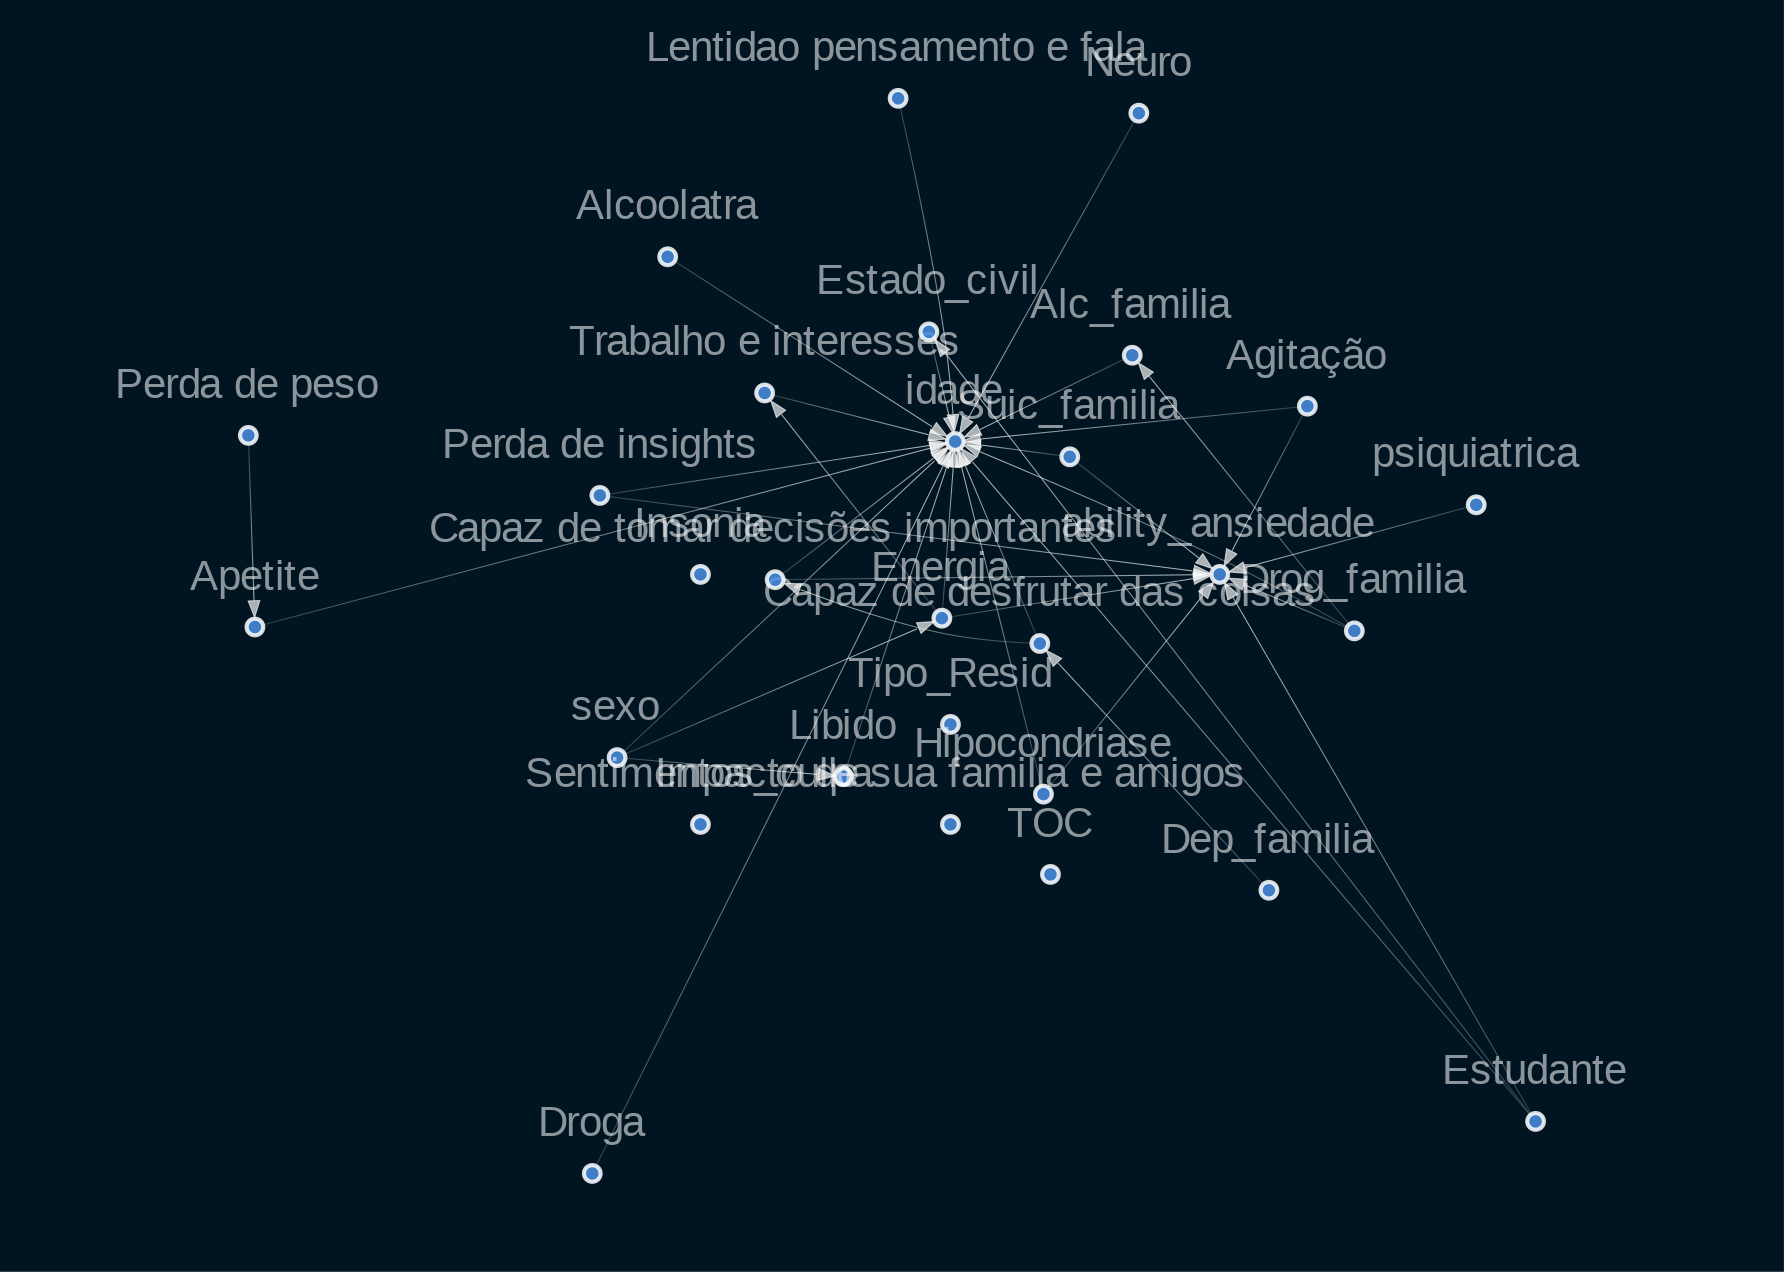

In [8]:
# Retirando arestas mais fracas
sm.remove_edges_below_threshold(0.5)
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.3"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
    prog='fdp',
)
Image(viz.draw(format='png'))

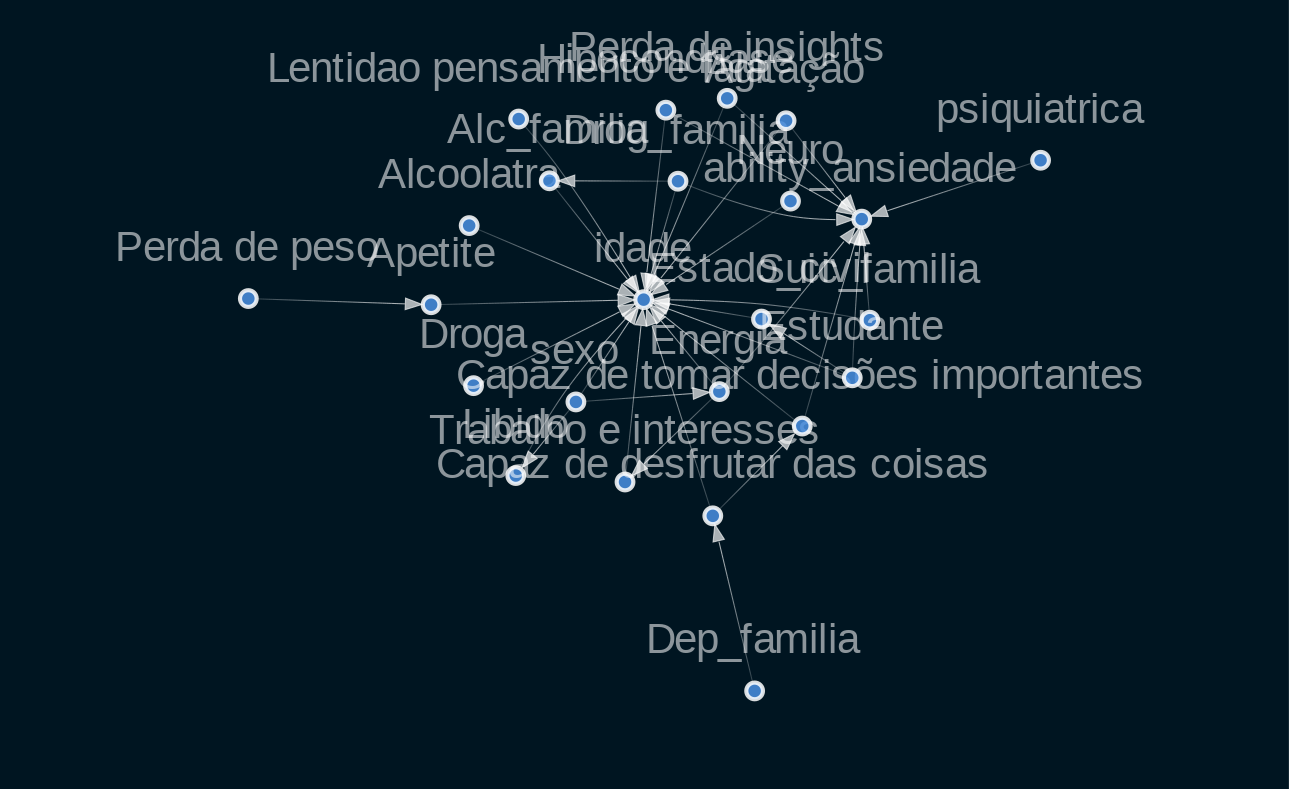

In [9]:
#obtendo maior subgrafo
sm = sm.get_largest_subgraph()
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
Image(viz.draw(format='png',args="-Nshape=box -Edir=forward -Ecolor=red "))

In [10]:
# Gerando Markov Blanket
mb = sm.get_markov_blanket('ability_ansiedade')

In [11]:
mb.edges

OutEdgeView([('Drog_familia', 'ability_ansiedade'), ('Energia', 'ability_ansiedade'), ('Perda de insights', 'ability_ansiedade'), ('Agitação', 'ability_ansiedade'), ('Estudante', 'ability_ansiedade'), ('Suic_familia', 'ability_ansiedade'), ('Hipocondriase', 'ability_ansiedade'), ('psiquiatrica', 'ability_ansiedade'), ('Capaz de tomar decisões importantes', 'ability_ansiedade')])

In [12]:
edges = [('Drog_familia', 'ability_ansiedade'), ('Energia', 'ability_ansiedade'), ('Perda de insights', 'ability_ansiedade'), ('Agitação', 'ability_ansiedade'), ('Estudante', 'ability_ansiedade'), ('Suic_familia', 'ability_ansiedade'), ('Hipocondriase', 'ability_ansiedade'), ('psiquiatrica', 'ability_ansiedade'), ('Capaz de tomar decisões importantes', 'ability_ansiedade')]

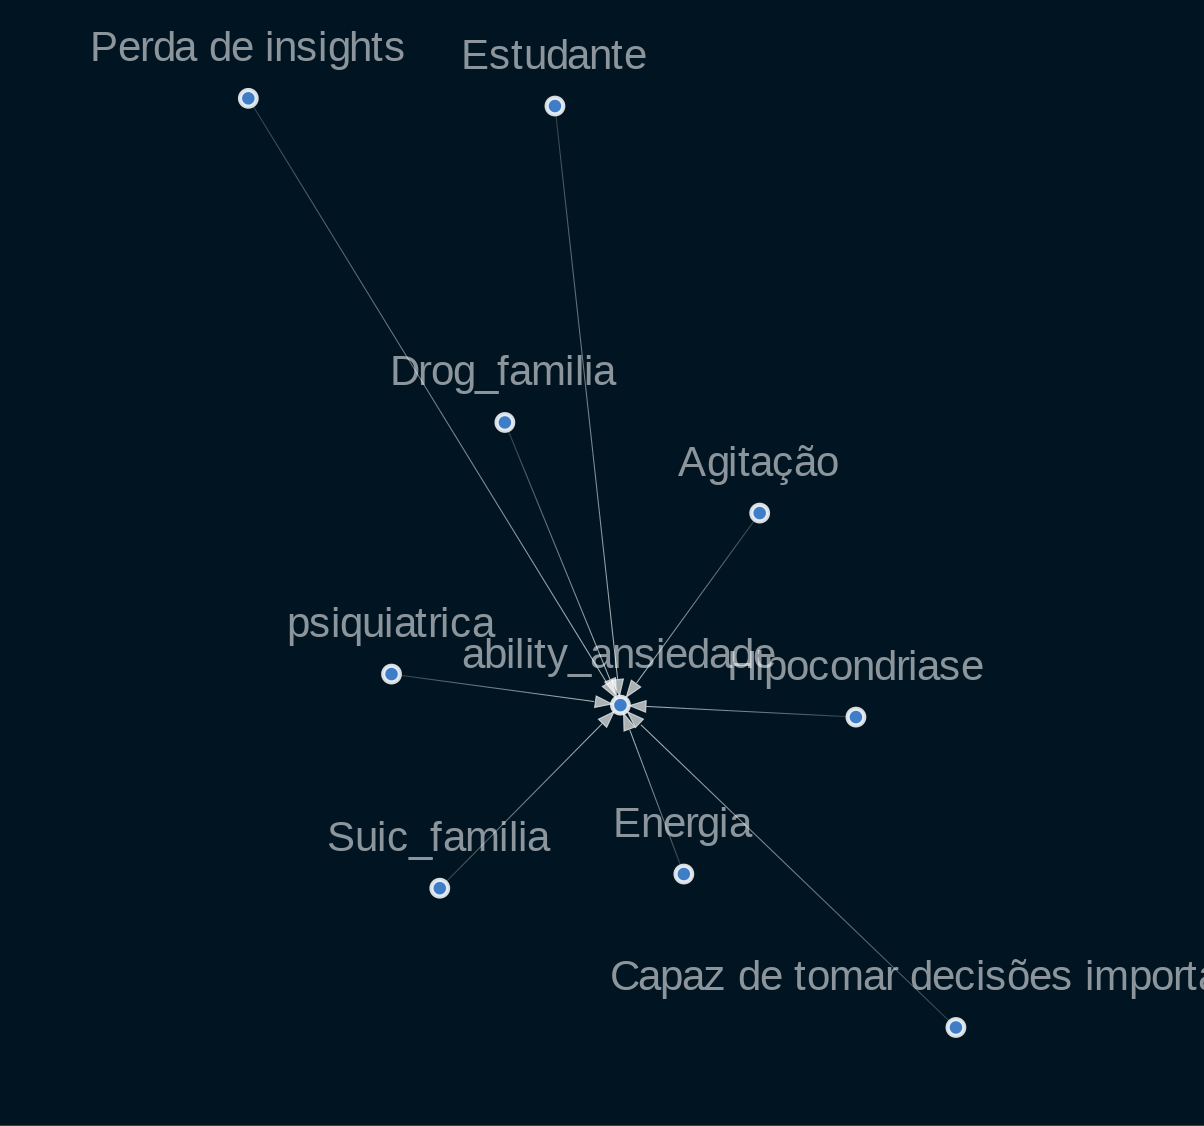

In [13]:
viz = plot_structure(
    mb,
    graph_attributes={"scale": "0.3"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
    prog='fdp',
)
Image(viz.draw(format='png'))

In [15]:
DAG = bn.make_DAG(edges)
bn.plot(DAG, interactive=True)

[bnlearn] >bayes DAG created.
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


{'ax': '/content/bnlearn_causal_network.html',
 'pos': {'Drog_familia': array([-0.28910034, -0.68599233]),
  'ability_ansiedade': array([ 0.53448967, -0.37429707]),
  'Energia': array([0.49423841, 0.34825685]),
  'Perda de insights': array([-0.54653588,  0.27781617]),
  'Agitação': array([ 0.0340468 , -0.33724817]),
  'Estudante': array([-0.58443131, -0.87909003]),
  'Suic_familia': array([-0.31403374,  0.67821019]),
  'Hipocondriase': array([1.        , 0.40611214]),
  'psiquiatrica': array([-0.63097973, -0.19732698]),
  'Capaz de tomar decisões importantes': array([0.30230612, 0.76355924])},
 'G': <networkx.classes.digraph.DiGraph at 0x7f347cdea3d0>,
 'node_properties': {'Drog_familia': {'node_color': '#1f456e',
   'node_size': 10},
  'ability_ansiedade': {'node_color': '#1f456e', 'node_size': 10},
  'Energia': {'node_color': '#1f456e', 'node_size': 10},
  'Perda de insights': {'node_color': '#1f456e', 'node_size': 10},
  'Agitação': {'node_color': '#1f456e', 'node_size': 10},
  'Est

In [16]:
sm.edges

OutEdgeView([('sexo', 'Energia'), ('sexo', 'Libido'), ('sexo', 'idade'), ('Estado_civil', 'idade'), ('Alcoolatra', 'idade'), ('Droga', 'idade'), ('Suic_familia', 'idade'), ('Suic_familia', 'ability_ansiedade'), ('Dep_familia', 'Capaz de desfrutar das coisas'), ('Alc_familia', 'idade'), ('Drog_familia', 'Alc_familia'), ('Drog_familia', 'idade'), ('Drog_familia', 'ability_ansiedade'), ('Neuro', 'idade'), ('psiquiatrica', 'ability_ansiedade'), ('Capaz de desfrutar das coisas', 'Capaz de tomar decisões importantes'), ('Capaz de desfrutar das coisas', 'idade'), ('Capaz de tomar decisões importantes', 'idade'), ('Capaz de tomar decisões importantes', 'ability_ansiedade'), ('Estudante', 'Estado_civil'), ('Estudante', 'idade'), ('Estudante', 'ability_ansiedade'), ('Perda de insights', 'idade'), ('Perda de insights', 'ability_ansiedade'), ('Apetite', 'idade'), ('Perda de peso', 'Apetite'), ('Hipocondriase', 'idade'), ('Hipocondriase', 'ability_ansiedade'), ('Trabalho e interesses', 'idade'), ('

In [17]:
edges = [('sexo', 'Energia'), ('sexo', 'Libido'), ('sexo', 'idade'), ('Estado_civil', 'idade'), ('Alcoolatra', 'idade'), ('Droga', 'idade'), ('Suic_familia', 'idade'), ('Suic_familia', 'ability_ansiedade'), ('Dep_familia', 'Capaz de desfrutar das coisas'), ('Alc_familia', 'idade'), ('Drog_familia', 'Alc_familia'), ('Drog_familia', 'idade'), ('Drog_familia', 'ability_ansiedade'), ('Neuro', 'idade'), ('psiquiatrica', 'ability_ansiedade'), ('Capaz de desfrutar das coisas', 'Capaz de tomar decisões importantes'), ('Capaz de desfrutar das coisas', 'idade'), ('Capaz de tomar decisões importantes', 'idade'), ('Capaz de tomar decisões importantes', 'ability_ansiedade'), ('Estudante', 'Estado_civil'), ('Estudante', 'idade'), ('Estudante', 'ability_ansiedade'), ('Perda de insights', 'idade'), ('Perda de insights', 'ability_ansiedade'), ('Apetite', 'idade'), ('Perda de peso', 'Apetite'), ('Hipocondriase', 'idade'), ('Hipocondriase', 'ability_ansiedade'), ('Trabalho e interesses', 'idade'), ('Energia', 'Trabalho e interesses'), ('Energia', 'idade'), ('Energia', 'ability_ansiedade'), ('Lentidao pensamento e fala', 'idade'), ('Agitação', 'idade'), ('Agitação', 'ability_ansiedade'), ('Libido', 'idade')]

In [18]:
DAG = bn.make_DAG(edges)
bn.plot(DAG, interactive=True)

[bnlearn] >bayes DAG created.
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


{'ax': '/content/bnlearn_causal_network.html',
 'pos': {'sexo': array([ 0.0642631 , -0.21891758]),
  'Energia': array([-0.11919456,  0.14873981]),
  'Libido': array([ 0.19900182, -0.52814485]),
  'idade': array([ 0.22752875, -0.40753047]),
  'Estado_civil': array([ 0.1308793 , -0.39205648]),
  'Alcoolatra': array([ 0.30919215, -0.26740686]),
  'Droga': array([ 0.20273112, -0.16283893]),
  'Suic_familia': array([-0.20838761,  0.31120449]),
  'ability_ansiedade': array([-0.65134422,  1.        ]),
  'Dep_familia': array([-0.0682887, -0.0701833]),
  'Capaz de desfrutar das coisas': array([ 0.02018912, -0.04545344]),
  'Alc_familia': array([ 0.2396759 , -0.23312498]),
  'Drog_familia': array([-0.13051596,  0.22466821]),
  'Neuro': array([ 0.16538454, -0.20861298]),
  'psiquiatrica': array([-0.60834831,  0.88783723]),
  'Capaz de tomar decisões importantes': array([-0.19152372,  0.30980131]),
  'Estudante': array([-0.16742636,  0.17816028]),
  'Perda de insights': array([-0.23399218,  0.284

In [ ]:
nx.drawing.nx_pydot.write_dot(sm, 'graph.dot')